In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')

In [3]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [5]:
y_train = df_train.csMPa.values
y_val = df_val.csMPa.values
y_test = df_test.csMPa.values

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

Predictions

In [6]:
y_pred = w_0 + X_train.dot(w)

NameError: name 'w_0' is not defined

# Determine Weights

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Select a first group of features

In [ ]:
base = ['superplasticizer', 'flyash', 'age']

In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [12]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

NameError: name 'prepare_X' is not defined

In [ ]:
y_pred = w_0 + X_train.dot(w)

NameError: name 'y_pred' is not defined

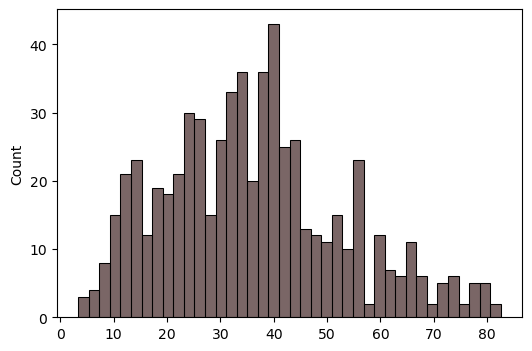

In [11]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()